In [167]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [168]:
import pandas as pd
import numpy as np

SEED = 42

np.random.seed (SEED)

In [169]:
from sklearn.model_selection import train_test_split

# Load the dataset
dataset_orig = pd.read_parquet ("./datasets/dataset_clean.parquet")

# Split the dataset
X = dataset_orig.drop(columns=['salary'], axis=1)
y = dataset_orig['salary']
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.2, random_state=SEED)

print ("X train")
print (X_train.info ())
print ()

print ("y train")
print (y_train.info ())
print ()

print ("X test")
print (X_test.info ())
print ()

print ("y test")
print (y_test.info ())
print ()

X train
<class 'pandas.core.frame.DataFrame'>
Index: 5347 entries, 2908 to 860
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   work_location  5347 non-null   object
 1   job_role       5347 non-null   object
 2   name           5347 non-null   object
 3   phone_number   5347 non-null   object
dtypes: object(4)
memory usage: 208.9+ KB
None

y train
<class 'pandas.core.series.Series'>
Index: 5347 entries, 2908 to 860
Series name: salary
Non-Null Count  Dtype  
--------------  -----  
5347 non-null   float64
dtypes: float64(1)
memory usage: 83.5 KB
None

X test
<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 3089 to 6652
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   work_location  1337 non-null   object
 1   job_role       1337 non-null   object
 2   name           1337 non-null   object
 3   phone_number   1337 non-null   objec

In [246]:
from sklearn.preprocessing import FunctionTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

RARE_THRESHOLD = 8

# job_role_counts = dataset_orig['job_role'].value_counts()
# rare_job_roles = job_role_counts[job_role_counts <= RARE_THRESHOLD]
average_salaries_per_job = dataset_orig.groupby("job_role")["salary"].mean()

# Consolidates rare job roles into new categories based on their average salary
def addMeanSalaries (X):
    X_new = pd.DataFrame ()
    X_new["mean_salary_for_job"] = X['job_role'].map(average_salaries_per_job)
    X_new["mean_salary_for_job"] = X_new["mean_salary_for_job"].fillna(X_new["mean_salary_for_job"].mean ())

    return np.array (X_new.values).reshape(-1, 1)

def getInputFeaturesForJob (self, input_features):
    return ["mean_salary_for_job"]

addMeanSalariesTransformer = FunctionTransformer(
    addMeanSalaries,
    feature_names_out=getInputFeaturesForJob
)

process_job_roles = Pipeline([
    ('generate_mean_salaries', addMeanSalariesTransformer),
    ("log_values", FunctionTransformer(np.log, inverse_func=np.exp, feature_names_out="one-to-one")),
    ('scale_mean_salaries', RobustScaler ())
])

In [286]:
from sklearn.compose import ColumnTransformer

# Create data preprocessing pipeline
preprocessing = ColumnTransformer([
    ("onehot_work_location", OneHotEncoder(handle_unknown="error"), ["work_location"]),
    ("process_job_roles", process_job_roles, ["job_role"]),
    ("onehot_job_role", OneHotEncoder(handle_unknown="infrequent_if_exist", min_frequency=RARE_THRESHOLD), ["job_role"]),
    # ("drop_job_role", "drop", ["job_role"])
], remainder="drop")

data_trans = preprocessing.fit_transform (dataset_orig)
columns_trans = preprocessing.get_feature_names_out()
dataset_trans = pd.DataFrame(data_trans.toarray(), columns=columns_trans)
print ("Number of columns: ", len(dataset_trans.columns))
print ()
print (*dataset_trans.columns, sep="\n")

Number of columns:  53

onehot_work_location__work_location_Australia
onehot_work_location__work_location_Canada
onehot_work_location__work_location_China
onehot_work_location__work_location_UK
onehot_work_location__work_location_USA
process_job_roles__mean_salary_for_job
onehot_job_role__job_role_Back end Developer
onehot_job_role__job_role_Business Analyst
onehot_job_role__job_role_Content Marketing Manager
onehot_job_role__job_role_Data Analyst
onehot_job_role__job_role_Data Scientist
onehot_job_role__job_role_Digital Marketing Manager
onehot_job_role__job_role_Digital Marketing Specialist
onehot_job_role__job_role_Director of Data Science
onehot_job_role__job_role_Director of HR
onehot_job_role__job_role_Director of Marketing
onehot_job_role__job_role_Director of Operations
onehot_job_role__job_role_Financial Analyst
onehot_job_role__job_role_Financial Manager
onehot_job_role__job_role_Front End Developer
onehot_job_role__job_role_Front end Developer
onehot_job_role__job_role_Full 

In [287]:
print (dataset_trans.head ())

   onehot_work_location__work_location_Australia  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   onehot_work_location__work_location_Canada  \
0                                         0.0   
1                                         0.0   
2                                         1.0   
3                                         0.0   
4                                         0.0   

   onehot_work_location__work_location_China  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   onehot_work_location__work_location_UK  \
0                                     1.0   
1            

In [288]:
from sklearn.linear_model import LinearRegression

# Create model pipeline
model = Pipeline([
    ('data_preprocessing', preprocessing),
    ('linear_reg', LinearRegression())
])

In [289]:
from sklearn.model_selection import cross_val_score

# Evaluates a trained model
def eval_model (input_model, X, y):
    scores = cross_val_score(input_model, X, y, cv=5)
    print ("Cross validation: ", scores) # Probably uses R2 since we're using a lin reg
    print ("Overall: ", scores.mean ())

In [290]:
# Train initial model
model.fit (X_train, y_train)
y_pred = model.predict (X_train)

eval_model (model, X_train, y_train)

Cross validation:  [0.59338693 0.55185677 0.61185777 0.62290868 0.5941028 ]
Overall:  0.5948225909550768


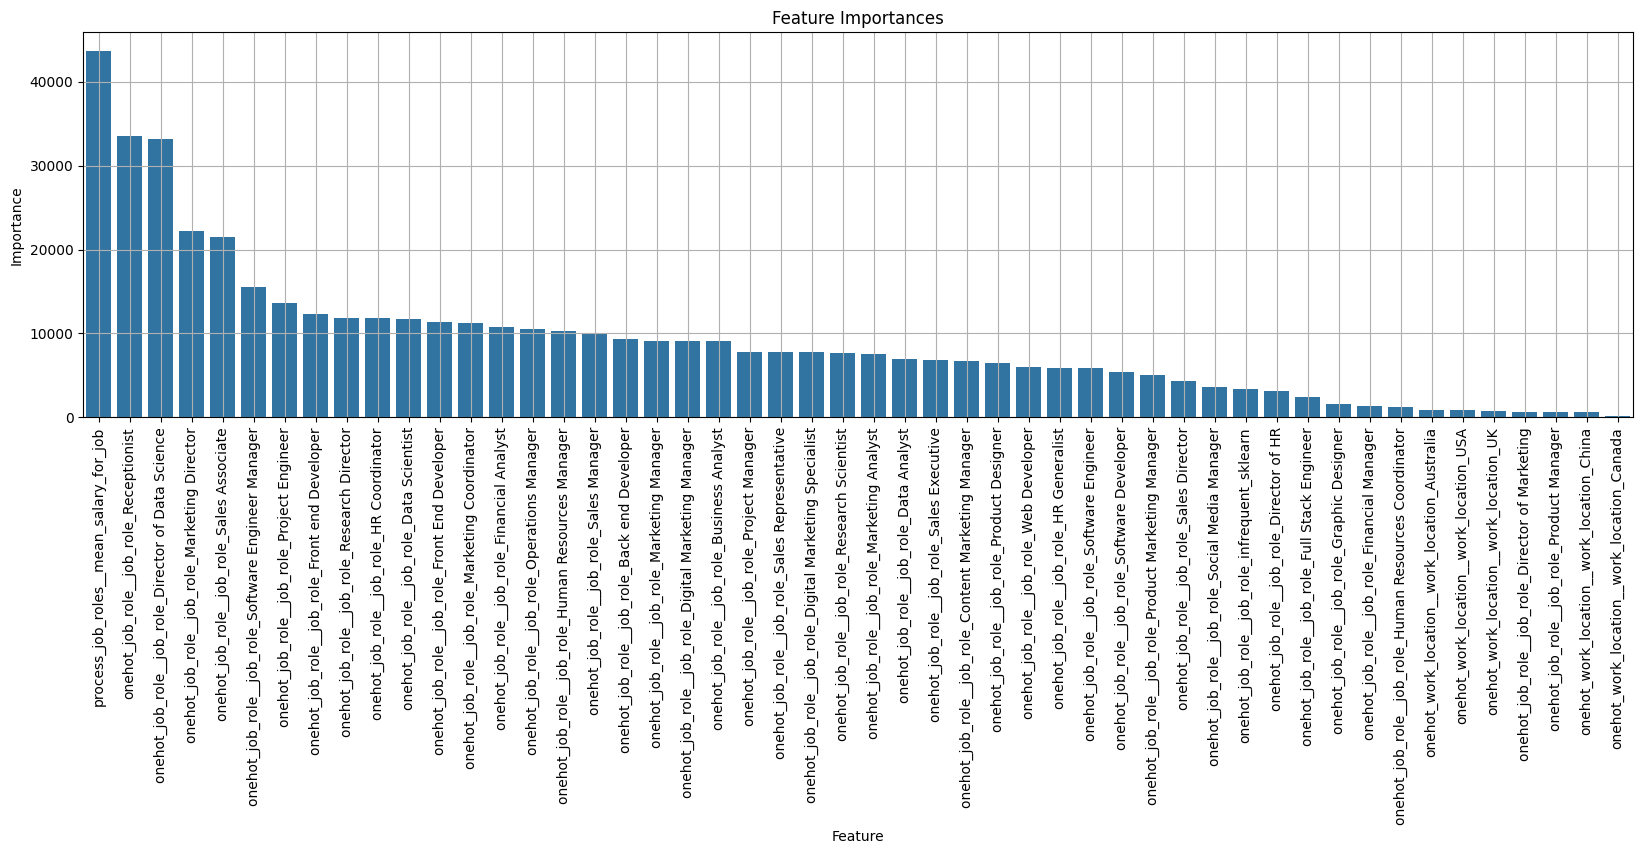

908.6069432891022
106.61629818811092
594.4326226799718
-748.1115621862854
-861.5443019591937
43734.67558626638
-9270.626460945385
-9063.595481626138
-6758.58618001982
-6976.404284963654
11727.72531972673
-9103.95555060652
-7780.408430244052
33158.60445465103
-3137.00728443518
680.6869622320843
-10802.341463293047
-1371.4046782096052
-11355.828931013608
-12256.580801424441
-2358.713301767505
-1576.5413569957493
11795.57816481384
-5898.424825907345
-1211.8523907120891
-10335.888761999176
-7511.576743529078
-11284.939790891218
22200.543316431933
-9113.015327898007
-10524.180117612439
-6427.86000609735
598.049728345169
-4991.2139458688125
13678.201019461876
-7837.367764388402
33504.327681124625
11874.441406350596
7694.821500492428
21549.60232992976
-4303.727696995362
6818.025778717831
-9915.683475534965
7818.166724098756
-3567.162627683491
-5452.466724527515
-5835.498283945401
15491.316076021067
-5957.19738917476
3389.9596159115445


In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = model.named_steps["data_preprocessing"].get_feature_names_out()
feature_importances = model.named_steps["linear_reg"].coef_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(feature_importances)  # Using absolute values for importance
})

plt.figure (figsize=(20,5))
plt.title('Feature Importances')
sns.barplot(importance_df.sort_values(by='Importance', ascending=False), x='Feature', y='Importance', errorbar=None)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

print (*feature_importances, sep="\n")

In [298]:
from sklearn.model_selection import GridSearchCV

# Tune the model
param_grid = {
    'linear_reg__fit_intercept': [True, False],
    # 'linear_reg__positive': [True, False]  # Constraint the coefficients to be positive
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)  # Convert back from negative MSE

# Get the best model
best_model = grid_search.best_estimator_

eval_model (best_model, X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'linear_reg__fit_intercept': True}
Best score: 1127506508.7287402
Cross validation:  [0.59338693 0.55185677 0.61185777 0.62290868 0.5941028 ]
Overall:  0.5948225909550768


In [299]:
eval_model (model, X_test, y_test)
eval_model (best_model, X_test, y_test)

Cross validation:  [0.49825234 0.56097996 0.63246195 0.58594606 0.55614193]
Overall:  0.5667564475062601
Cross validation:  [0.49825234 0.56097996 0.63246195 0.58594606 0.55614193]
Overall:  0.5667564475062601


In [292]:
import pickle

with open('./trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)